In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

In [2]:
df = pd.read_csv('Data Collection Form_Cervix Cancer - V1_De_identified.csv')

In [3]:
df.head()

,Study Code,Age,Stage of Malignancy,ECOG Performance Status,Suburb of Residence,SEIFA Score,SEIFA Quartile,Postcode,Valid,MMM Code,...,Stage Simplified,Time 1 - Compliance,Time 2 - Compliant,Time 3 - Compliant,In Area/Out of Area Time 1 Categories,In Area/Out of Area Time 2 Categories,In Area/Out of Area Time 3 Categories,IRSD (Time Frame 1),IRSD (Time Frame 2),IRSD (Time Frame 3)
0,1,65,IIIC1,0.0,Merrylands,871.951173,1,2160,Y,1,...,III/IV,Non-Compliant,Compliant,NaN,2.0,1.0,NaN,2.0,1.0,NaN
1,2,30,IIIC,0.0,Katoomba,963.855346,2,2780,Y,1,...,III/IV,Non-Compliant,Compliant,Compliant,4.0,3.0,3.0,4.0,3.0,3.0
2,3,40,IIA,0.0,Penrith,933.728338,2,2750,Y,1,...,I/II,Non-Compliant,Compliant,NaN,4.0,3.0,NaN,4.0,3.0,NaN
3,4,45,IIIC,0.0,Guildford (NSW),822.753387,1,2161,Y,1,...,III/IV,Non-Compliant,Non-Compliant,Compliant,2.0,2.0,1.0,2.0,2.0,1.0
4,7,81,IB1,0.0,Glossodia,1041.424531,4,2756,Y,2,...,I/II,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df['Metro'] = [1 if x == 1 else 0 for x in df['MMM Code']]

In [5]:
predictors = [
    'Age',
    'SEIFA Score',
    'Metro',
    'Route of Referral',
    'Provider Type of Gynaecologist Appointment',
    'In Area/Out of Area',
    'Stage Simplified'
]


outcome_variables = [
    'Time 1 - Compliance',
    'Time 2 - Compliant',
    'Time 3 - Compliant'

]
X = df[predictors]

In [6]:
X.head()

,Age,SEIFA Score,Metro,Route of Referral,Provider Type of Gynaecologist Appointment,In Area/Out of Area,Stage Simplified
0,65,871.951173,1,GP Referred,NaN,In Area,III/IV
1,30,963.855346,1,GP Referred,Public,Out of Area,III/IV
2,40,933.728338,1,GP Referred,NaN,Out of Area,I/II
3,45,822.753387,1,GP Referred,Private,In Area,III/IV
4,81,1041.424531,0,GP Referred,Private,Out of Area,I/II


In [7]:
X.isnull().sum()

Age                                            0
SEIFA Score                                    0
Metro                                          0
Route of Referral                              0
Provider Type of Gynaecologist Appointment    33
In Area/Out of Area                            0
Stage Simplified                               0
dtype: int64

In [8]:
df['MMM Code'].value_counts()

MMM Code
1    147
5     16
3     12
4     11
2      2
7      1
Name: count, dtype: int64

In [9]:
df[outcome_variables].isnull().sum()

Time 1 - Compliance    11
Time 2 - Compliant      2
Time 3 - Compliant     61
dtype: int64

In [10]:
y = pd.get_dummies(df[outcome_variables[2]],drop_first=True,dtype = int,dummy_na = True,prefix='y')

In [11]:
sub_y = y.query('y_nan == 0')
data_index = sub_y.index

In [12]:
sub_y

,y_Non-Compliant,y_nan
1,0,0
3,0,0
6,0,0
8,0,0
9,1,0
...,...,...
181,1,0
183,1,0
184,0,0
185,0,0


In [13]:
def plot_partial_residual(model,feature,X,y):

    # Compute partial residuals for X1
    pred_logit = model.predict(X)  # Predicted log-odds
    residuals = y - pred_logit  # Compute residuals
    partial_residual = X[feature]* model.params[feature] + residuals  # Partial residuals

    # Plot Partial Residuals
    sns.scatterplot(x=X[feature], y=partial_residual, alpha=0.6,hue=y)
    sns.regplot(x=X[feature], y=partial_residual, scatter=False, lowess=True, color='red')  # LOWESS curve

    plt.axhline(y=0, linestyle='--', color='black', alpha=0.7)
    plt.xlabel(feature)
    plt.ylabel("Partial Residuals")
    plt.title("Partial Residual Plot for {}".format(feature))
    plt.show()

In [14]:
X = df.loc[data_index,predictors]
X = pd.get_dummies(X,drop_first=True,dtype = int,columns =  [
    'Route of Referral',
    'In Area/Out of Area',
    'Stage Simplified',
    'Provider Type of Gynaecologist Appointment'
])
#X = pd.get_dummies(X,dummy_na = True,drop_first=True,dtype = int,columns= ['Provider Type of Gynaecologist Appointment'])

In [15]:
y.value_counts()

y_Non-Compliant  y_nan
0                0        76
                 1        61
1                0        52
Name: count, dtype: int64

In [16]:
#X['Age'] = (X['Age'] - np.mean(X['Age']))/np.std(X['Age'])
#X['SEIFA Score'] = (X['SEIFA Score'] - np.mean(X['SEIFA Score']))/np.std(X['SEIFA Score'])

In [17]:
X.columns

Index(['Age', 'SEIFA Score', 'Metro', 'Route of Referral_GP Referred',
       'In Area/Out of Area_Out of Area', 'Stage Simplified_III/IV',
       'Provider Type of Gynaecologist Appointment_Public'],
      dtype='object')

In [18]:
pd.concat([sub_y['y_Non-Compliant'],X],axis=1).corr()

,y_Non-Compliant,Age,SEIFA Score,Metro,Route of Referral_GP Referred,In Area/Out of Area_Out of Area,Stage Simplified_III/IV,Provider Type of Gynaecologist Appointment_Public
y_Non-Compliant,1.000000,0.054601,-0.277095,-0.056836,0.007807,0.101020,0.005001,0.201092
Age,0.054601,1.000000,0.008018,-0.111291,-0.177858,0.038213,-0.175921,0.065471
SEIFA Score,-0.277095,0.008018,1.000000,0.013987,0.194848,0.033688,-0.064611,-0.229579
Metro,-0.056836,-0.111291,0.013987,1.000000,0.125933,-0.452371,-0.022588,0.058538
Route of Referral_GP Referred,0.007807,-0.177858,0.194848,0.125933,1.000000,-0.020664,-0.020664,-0.394580
In Area/Out of Area_Out of Area,0.101020,0.038213,0.033688,-0.452371,-0.020664,1.000000,0.019521,-0.030317
Stage Simplified_III/IV,0.005001,-0.175921,-0.064611,-0.022588,-0.020664,0.019521,1.000000,-0.030317
Provider Type of Gynaecologist Appointment_Public,0.201092,0.065471,-0.229579,0.058538,-0.394580,-0.030317,-0.030317,1.000000


In [19]:
X.columns

Index(['Age', 'SEIFA Score', 'Metro', 'Route of Referral_GP Referred',
       'In Area/Out of Area_Out of Area', 'Stage Simplified_III/IV',
       'Provider Type of Gynaecologist Appointment_Public'],
      dtype='object')

In [20]:
def formula_from_cols(df, y):
    return y + ' ~ ' + ' + '.join([col for col in df.columns if not col==y])

In [21]:
formula_from_cols(X,'y_Non-Compliant')

'y_Non-Compliant ~ Age + SEIFA Score + Metro + Route of Referral_GP Referred + In Area/Out of Area_Out of Area + Stage Simplified_III/IV + Provider Type of Gynaecologist Appointment_Public'

In [22]:
# Fit the logistic regression model using statsmodels
X = sm.add_constant(X)  # Add intercept

model = sm.Logit(sub_y['y_Non-Compliant'],X).fit()

# Print model summary
print(model.summary())
print(model.bic)
print(model.aic)

Optimization terminated successfully.
         Current function value: 0.604919
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:        y_Non-Compliant   No. Observations:                  128
Model:                          Logit   Df Residuals:                      120
Method:                           MLE   Df Model:                            7
Date:                Wed, 26 Mar 2025   Pseudo R-squ.:                  0.1044
Time:                        20:20:53   Log-Likelihood:                -77.430
converged:                       True   LL-Null:                       -86.459
Covariance Type:            nonrobust   LLR p-value:                   0.01170
                                                        coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------
const                         

In [23]:
# Add log-transformed versions of continuous predictors


log_X = X.copy(deep=True) # Add intercept
log_X['Age_log'] = log_X['Age'] * np.log(log_X['Age'])
log_X['SEIFA_log'] = log_X['SEIFA Score'] * np.log(log_X['SEIFA Score'])

# Fit logistic regression model
log_model = sm.Logit(sub_y['y_Non-Compliant'],log_X).fit()

# Print summary
print(log_model.summary())


Optimization terminated successfully.
         Current function value: 0.604157
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:        y_Non-Compliant   No. Observations:                  128
Model:                          Logit   Df Residuals:                      118
Method:                           MLE   Df Model:                            9
Date:                Wed, 26 Mar 2025   Pseudo R-squ.:                  0.1056
Time:                        20:20:58   Log-Likelihood:                -77.332
converged:                       True   LL-Null:                       -86.459
Covariance Type:            nonrobust   LLR p-value:                   0.03233
                                                        coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------
const                         

Box-Tidwell Test suggests that both age and seifa does not have a non linear term

D:\Program Files\anacondav2\envs\cervix_compliance\Lib\site-packages\statsmodels\nonparametric\smoothers_lowess.py:226: RuntimeWarning: invalid value encountered in divide
  res, _ = _lowess(y, x, x, np.ones_like(x),


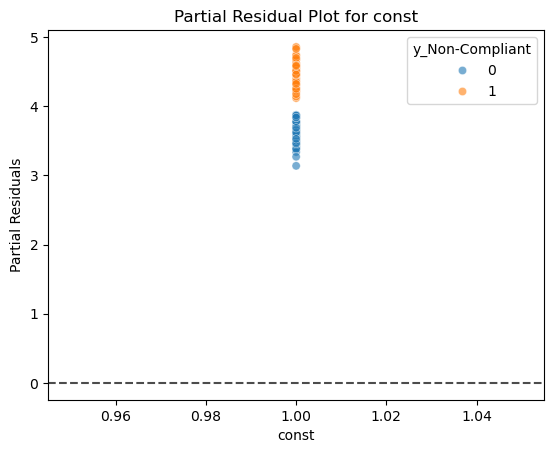

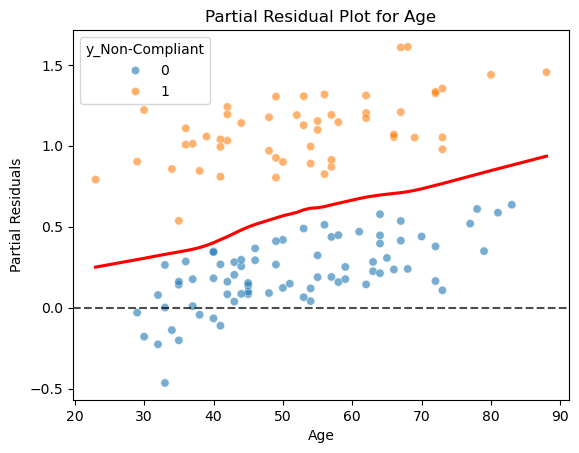

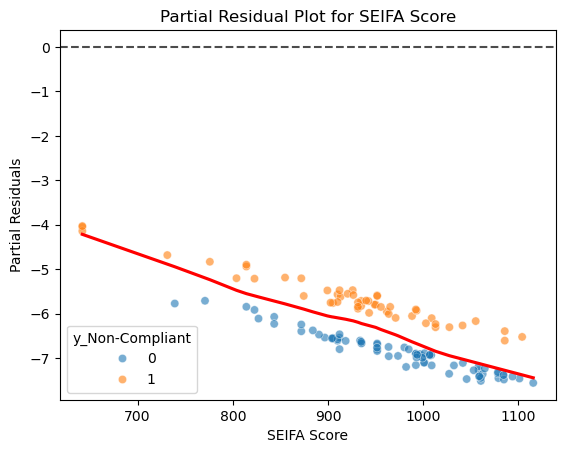

D:\Program Files\anacondav2\envs\cervix_compliance\Lib\site-packages\statsmodels\nonparametric\smoothers_lowess.py:226: RuntimeWarning: invalid value encountered in divide
  res, _ = _lowess(y, x, x, np.ones_like(x),


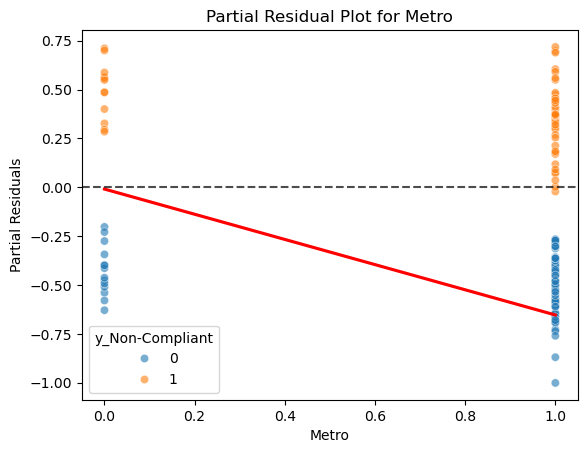

D:\Program Files\anacondav2\envs\cervix_compliance\Lib\site-packages\statsmodels\nonparametric\smoothers_lowess.py:226: RuntimeWarning: invalid value encountered in divide
  res, _ = _lowess(y, x, x, np.ones_like(x),


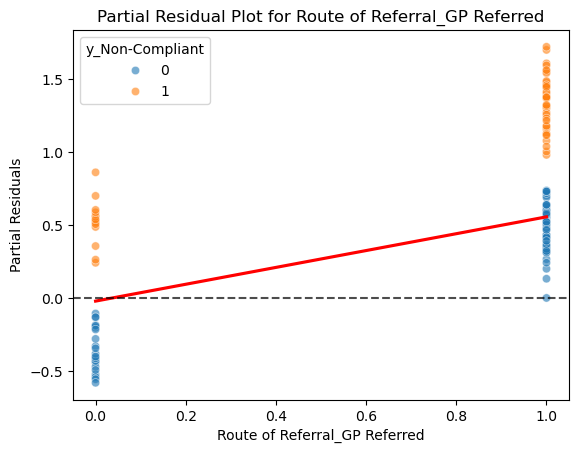

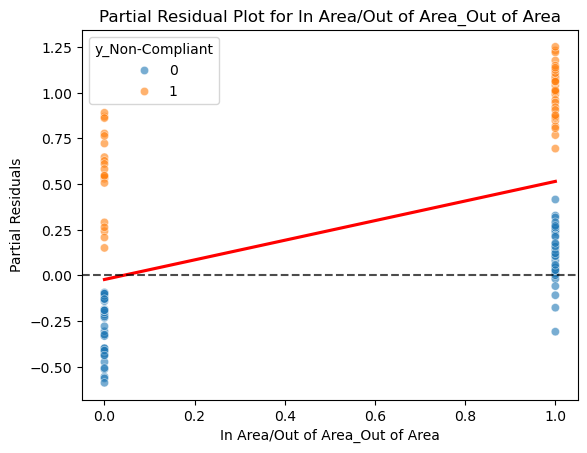

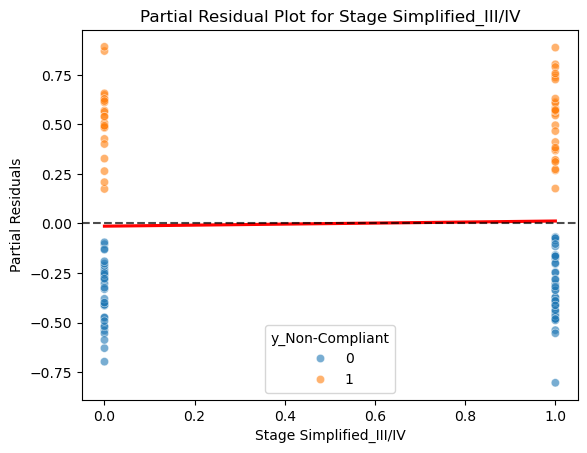

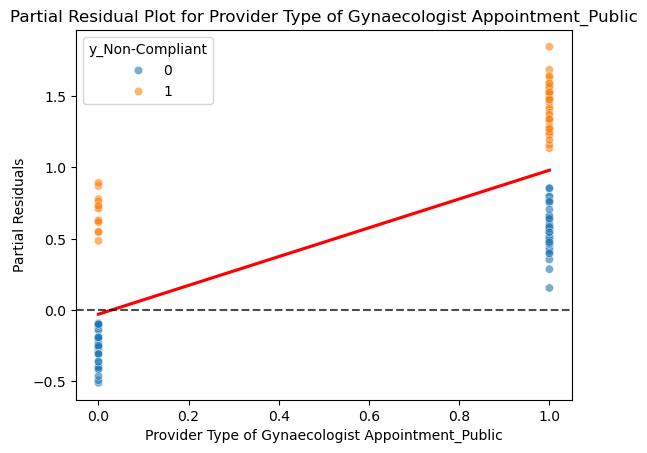

In [49]:

for c in X.columns:
    plot_partial_residual(model,c,X,sub_y['y_Non-Compliant'])

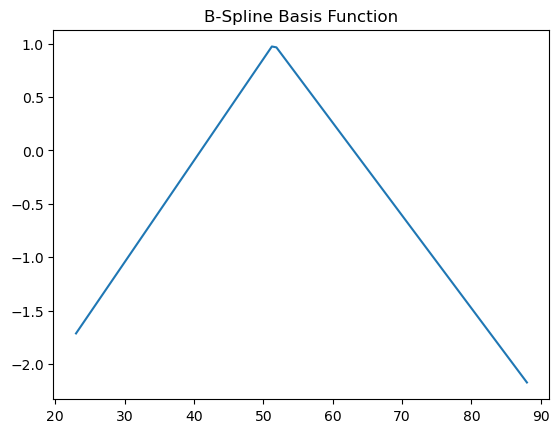

In [24]:
from scipy.interpolate import BSpline
knots = np.percentile(X['Age'], [25,50,75])  # Specify knot locations
degree = 2  # Cubic spline

# Generate basis functions
x = np.linspace(min(X['Age']), max(X['Age']), 100)
spl = BSpline.basis_element(knots)

# Plot the B-spline basis
plt.plot(x, spl(x))
plt.title("B-Spline Basis Function")
plt.show()

In [25]:
# Fit the logistic regression model using statsmodels
new_X = X.copy(deep=True) 


new_X['Age'] = (new_X['Age'] - np.mean(new_X['Age']))/np.std(new_X['Age'])
new_X['SEIFA Score'] = (new_X['SEIFA Score'] - np.mean(new_X['SEIFA Score']))/np.std(new_X['SEIFA Score'])

new_X['StageAge'] = X['Stage Simplified_III/IV']*X['Age'] 
#new_X['StageSEIFA'] = X['Provider Type of Gynaecologist Appointment_Public']*X['Age']**0.5
#new_X['AgeInArea'] = X['In Area/Out of Area_Out of Area']*X['Age'] # 286.5 254.2

#new_X['AgeStage'] = X['Route of Referral_GP Referred']*X['Age'] # 
#new_X['Age2'] = np.log(X['Age'])
#new_X = new_X.drop(['Age'],axis=1)


new_model = sm.Logit(sub_y['y_Non-Compliant'],new_X).fit()

# Print model summary
print(new_model.summary())
print(new_model.bic)
print(new_model.aic)

Optimization terminated successfully.
         Current function value: 0.584644
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:        y_Non-Compliant   No. Observations:                  128
Model:                          Logit   Df Residuals:                      119
Method:                           MLE   Df Model:                            8
Date:                Wed, 26 Mar 2025   Pseudo R-squ.:                  0.1345
Time:                        20:21:06   Log-Likelihood:                -74.834
converged:                       True   LL-Null:                       -86.459
Covariance Type:            nonrobust   LLR p-value:                  0.003057
                                                        coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------
const                         

In [26]:
from scipy.stats import chi2

lr_stat = 2 * (new_model.llf - model.llf)
p_value = chi2.sf(lr_stat, df=len(new_model.params) - len(model.params))
print(p_value)

0.022709663529236375


D:\Program Files\anacondav2\envs\cervix_compliance\Lib\site-packages\statsmodels\nonparametric\smoothers_lowess.py:226: RuntimeWarning: invalid value encountered in divide
  res, _ = _lowess(y, x, x, np.ones_like(x),


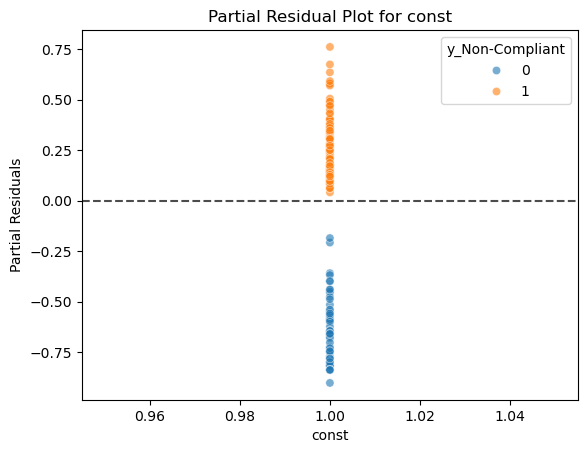

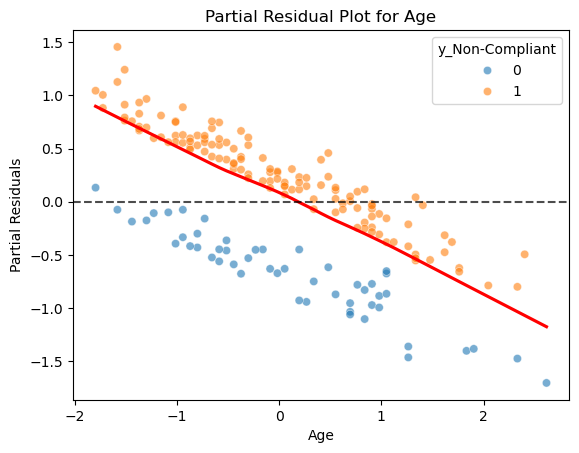

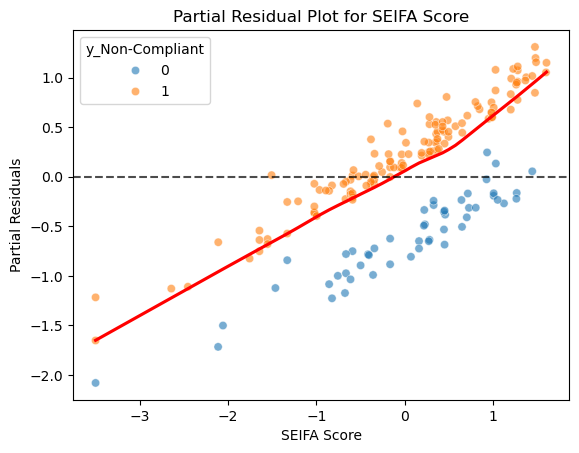

D:\Program Files\anacondav2\envs\cervix_compliance\Lib\site-packages\statsmodels\nonparametric\smoothers_lowess.py:226: RuntimeWarning: invalid value encountered in divide
  res, _ = _lowess(y, x, x, np.ones_like(x),


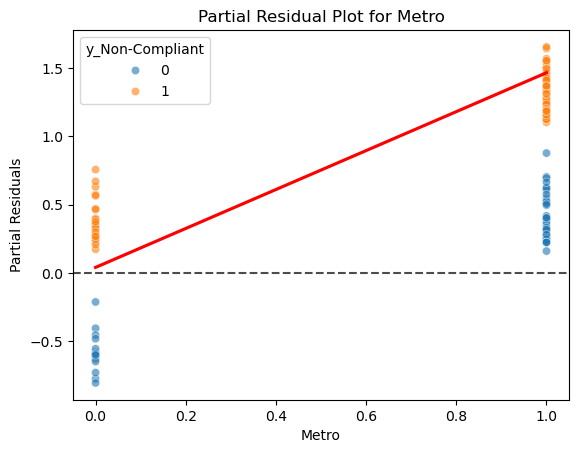

D:\Program Files\anacondav2\envs\cervix_compliance\Lib\site-packages\statsmodels\nonparametric\smoothers_lowess.py:226: RuntimeWarning: invalid value encountered in divide
  res, _ = _lowess(y, x, x, np.ones_like(x),


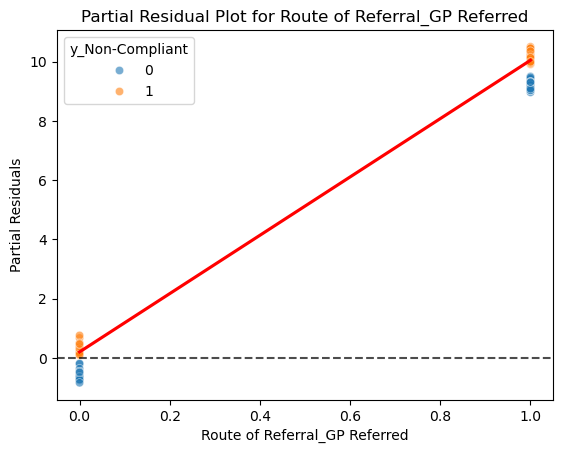

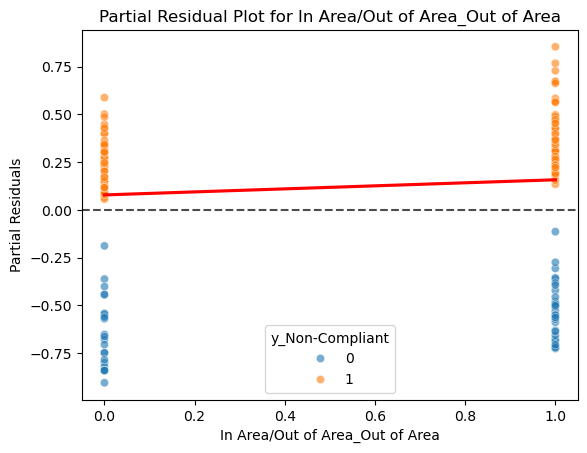

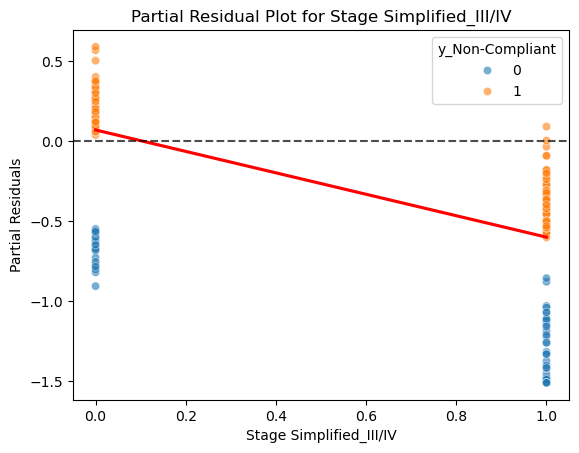

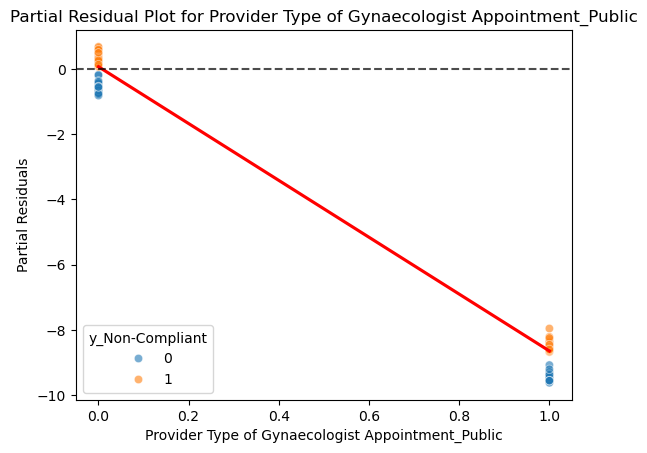

D:\Program Files\anacondav2\envs\cervix_compliance\Lib\site-packages\statsmodels\nonparametric\smoothers_lowess.py:226: RuntimeWarning: invalid value encountered in divide
  res, _ = _lowess(y, x, x, np.ones_like(x),


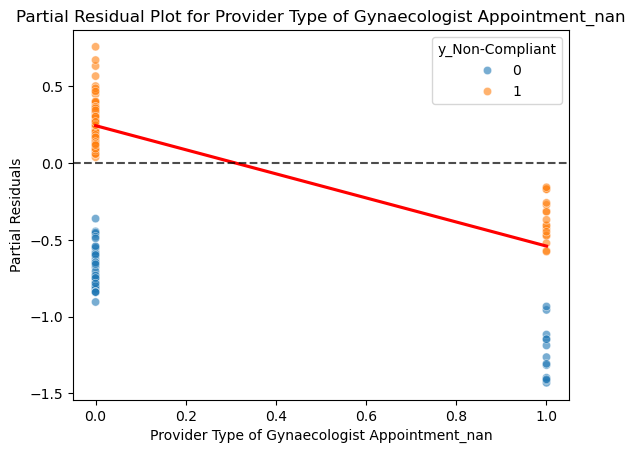

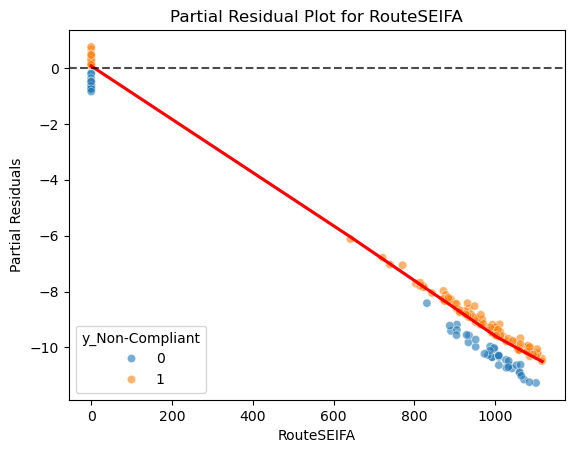

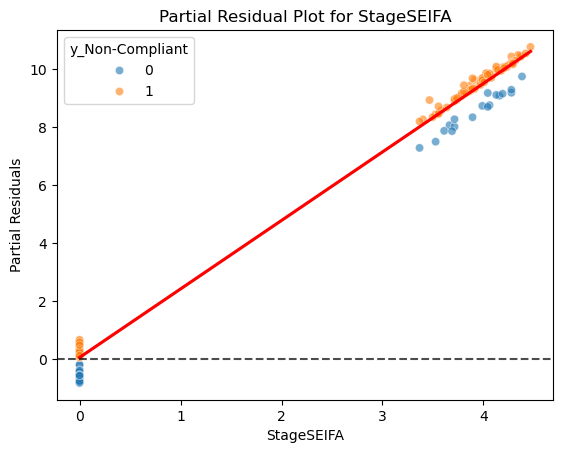

In [50]:
for c in new_X.columns:
    plot_partial_residual(new_model,c,new_X,sub_y['y_Non-Compliant'])

In [249]:
X['fitted'] = model.predict(X)
X['fitted_squared'] = X['fitted'] ** 2

## neither is significant
## model does not explain the data well
link_test = sm.Logit(sub_y['y_Non-Compliant'], X[['const', 'fitted', 'fitted_squared']]).fit()
print(link_test.summary())

Optimization terminated successfully.
         Current function value: 0.655200
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:        y_Non-Compliant   No. Observations:                  187
Model:                          Logit   Df Residuals:                      184
Method:                           MLE   Df Model:                            2
Date:                Sun, 23 Mar 2025   Pseudo R-squ.:                 0.03799
Time:                        21:13:04   Log-Likelihood:                -122.52
converged:                       True   LL-Null:                       -127.36
Covariance Type:            nonrobust   LLR p-value:                  0.007920
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -2.4753      2.042     -1.212      0.225      -6.477       1.527
fitted           

In [183]:
import statsmodels.stats.outliers_influence as oi

infl = model.get_influence()
cooks_d = infl.cooks_distance[0]

# Identify points with high Cook's distance
influential_points = np.where(cooks_d > 4 / len(X))[0]
print("Influential Points:", influential_points)

Influential Points: [ 22  51 169]


In [109]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = pd.DataFrame()
vif_data["Feature"] = new_X.columns
vif_data["VIF"] = [variance_inflation_factor(new_X.values, i) for i in range(new_X.shape[1])]
print(vif_data)

                                             Feature         VIF
0                                              const   17.068659
1                                        SEIFA Score   10.958568
2                                              Metro  221.572503
3                      Route of Referral_GP Referred    1.232635
4                            Stage Simplified_III/IV    1.022112
5  Provider Type of Gynaecologist Appointment_Public    1.550238
6     Provider Type of Gynaecologist Appointment_nan    1.261186
7                                          AgeInArea    1.339576
8                                         MetroSEIFA  238.035657
9                                               Age2    1.013212


In [198]:
X['Age_logAge'] = X['Age'] * np.log(X['Age'])

# Fit logistic regression with interaction term
age = sm.add_constant(X[['Age', 'Age_logAge']])
model = sm.Logit(sub_y['y_Non-Compliant'], age).fit()
print(model.summary())

Optimization terminated successfully.
         Current function value: 0.667447
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:        y_Non-Compliant   No. Observations:                  187
Model:                          Logit   Df Residuals:                      184
Method:                           MLE   Df Model:                            2
Date:                Sun, 23 Mar 2025   Pseudo R-squ.:                 0.02001
Time:                        18:43:05   Log-Likelihood:                -124.81
converged:                       True   LL-Null:                       -127.36
Covariance Type:            nonrobust   LLR p-value:                   0.07823
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.0473      3.880      1.816      0.069      -0.557      14.651
Age           -0.7387      0.

In [199]:
X['SEIFA_logSEIFA'] = X['SEIFA Score'] * np.log(X['SEIFA Score'])

# Fit logistic regression with interaction term
seifa = sm.add_constant(X[['SEIFA Score', 'SEIFA_logSEIFA']])
model = sm.Logit(sub_y['y_Non-Compliant'], seifa).fit()
print(model.summary())

Optimization terminated successfully.
         Current function value: 0.680392
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:        y_Non-Compliant   No. Observations:                  187
Model:                          Logit   Df Residuals:                      184
Method:                           MLE   Df Model:                            2
Date:                Sun, 23 Mar 2025   Pseudo R-squ.:                0.001001
Time:                        18:43:10   Log-Likelihood:                -127.23
converged:                       True   LL-Null:                       -127.36
Covariance Type:            nonrobust   LLR p-value:                    0.8803
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const              2.7699     17.913      0.155      0.877     -32.339      37.879
SEIFA Score      

In [200]:
X = df.loc[data_index,predictors]
X = pd.get_dummies(X,drop_first=True,dtype = int,columns =  [
    'Route of Referral',
    'In Area/Out of Area',
    'Stage Simplified'
])
X = pd.get_dummies(X,dummy_na = True,drop_first=True,dtype = int,columns= ['Provider Type of Gynaecologist Appointment'])

X = sm.add_constant(X)

# Probit Model
model_probit = sm.Probit(sub_y['y_Non-Compliant'], X).fit()
print(model_probit.summary())

# Complementary Log-Log Model
model_cloglog = sm.GLM(sub_y['y_Non-Compliant'], X, family=sm.families.Binomial(link=sm.families.links.cloglog())).fit()
print(model_cloglog.summary())

Optimization terminated successfully.
         Current function value: 0.654443
         Iterations 4
                          Probit Regression Results                           
Dep. Variable:        y_Non-Compliant   No. Observations:                  187
Model:                         Probit   Df Residuals:                      178
Method:                           MLE   Df Model:                            8
Date:                Sun, 23 Mar 2025   Pseudo R-squ.:                 0.03910
Time:                        18:43:30   Log-Likelihood:                -122.38
converged:                       True   LL-Null:                       -127.36
Covariance Type:            nonrobust   LLR p-value:                    0.2679
                                                        coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------
const                         

D:\Program Files\anacondav2\envs\cervix_compliance\Lib\site-packages\statsmodels\genmod\families\links.py:13: FutureWarning: The cloglog link alias is deprecated. Use CLogLog instead. The cloglog link alias will be removed after the 0.15.0 release.
  warnings.warn(


In [107]:
print(model_probit.aic)
print(model.aic)
print(model_cloglog.aic)

216.58463706839956
219.12706495582302
216.23680943484456


In [108]:
print(model_probit.bic)
print(model.bic)
print(model_cloglog.bic)

245.2206890210283
228.67241560669927
-677.4846105645179


D:\Program Files\anacondav2\envs\cervix_compliance\Lib\site-packages\statsmodels\genmod\generalized_linear_model.py:1923: FutureWarning: The bic value is computed using the deviance formula. After 0.13 this will change to the log-likelihood based formula. This change has no impact on the relative rank of models compared using BIC. You can directly access the log-likelihood version using the `bic_llf` attribute. You can suppress this message by calling statsmodels.genmod.generalized_linear_model.SET_USE_BIC_LLF with True to get the LLF-based version now or False to retainthe deviance version.
  warnings.warn(


In [109]:
import numpy as np

infl = model.get_influence()
cooks_d = infl.cooks_distance[0]

# Identify influential points
influential_points = np.where(cooks_d > 4 / len(X))[0]
print("Influential Points:", influential_points)

Influential Points: [ 18  22  67  74 140 172]


In [244]:
from sklearn.ensemble import RandomForestClassifier

# Fit a Random Forest model
rf = RandomForestClassifier()
rf.fit(X, sub_y['y_Non-Compliant'])

# Feature importance (interactions may be needed if two variables are important)
importances = pd.Series(rf.feature_importances_, index=X.columns)
print(importances.sort_values(ascending=False))

SEIFA Score                                          0.405568
Age                                                  0.372072
Metro                                                0.044752
Stage Simplified_III/IV                              0.041575
In Area/Out of Area_Out of Area                      0.036666
Provider Type of Gynaecologist Appointment_Public    0.036494
Route of Referral_GP Referred                        0.035166
Provider Type of Gynaecologist Appointment_nan       0.027707
dtype: float64
